In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

embeddings = np.load('synopsis_embeddings.npy')
df = pd.read_csv('movies_cleaned.csv')

In [5]:
scores = []
best_k = -1
best_score = -1

for k in range(3,16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    score = silhouette_score(embeddings, labels)
    scores.append(score)
    if score > best_score:
        best_k = k
        best_score = score
print(f'Best k: {best_k} with silhouette score: {best_score:.4f}')

Best k: 3 with silhouette score: 0.0211


In [6]:
#applying KMeans with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
labels = kmeans.fit_predict(embeddings)
df['cluster'] = labels

tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings)

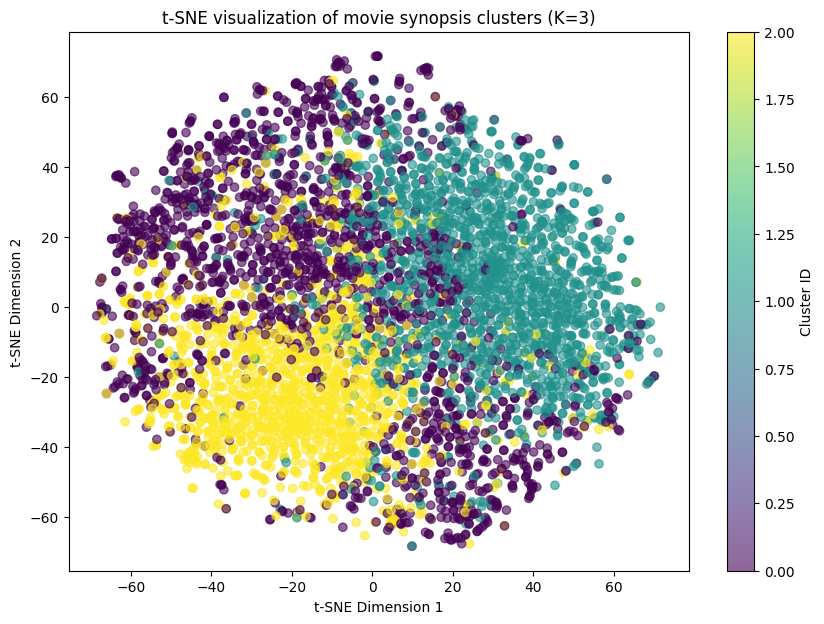

In [7]:
plt.figure(figsize=(10,7))
scatter =plt.scatter(embeddings_2d[:,0], embeddings_2d[:,1], c=df['cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster ID')
plt.title(f't-SNE visualization of movie synopsis clusters (K={best_k})')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()